# Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.interpolating_function import inter_poly

## Manual input

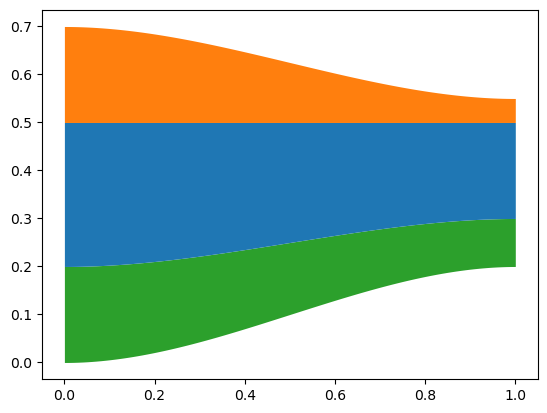

In [2]:
x = np.linspace(start=0, stop=1, num=100)

ini0, ini1, ini2, ini3 = 0, 0.2, 0.5, 0.7
val0, val1, val2, val3 = 0.2, 0.3, 0.5, 0.55

wave3 = inter_poly(x, parmaters=[0, ini3, 1, val3])
wave2 = inter_poly(x, parmaters=[0, ini2, 1, val2])
wave1 = inter_poly(x, parmaters=[0, ini1, 1, val1])
wave0 = inter_poly(x, parmaters=[0, ini0, 1, val0])

fig, ax = plt.subplots()
ax.fill_between(x, wave0, wave1, linewidth=0, color='tab:green')
ax.fill_between(x, wave1, wave2, linewidth=0, color='tab:blue')
ax.fill_between(x, wave2, wave3, linewidth=0, color='tab:orange')

plt.show()


## loop

### inner loop

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.interpolating_function import inter_poly

data_num = np.array(
    [[12, 20, 70,  5],
     [ 5, 30,  0, 20],
     [25, 60, 20,  8],
     [50, 25,  0,  0]]
     )
     
# col_0 = data_num.T[0]
# col_1 = data_num.T[1]
# max_of_columns = np.max(np.sum(a=data_num, axis=0))
# data_normalised = data_num/max_of_columns
# column_heights = np.sum(a=data_normalised, axis=0)
# column_floor = 

# np.cumsum(np.flip(data_num),axis=0)  

# for val in col_0:
print(np.sum(a=data_num, axis=0))
np.cumsum(np.flip(data_num,axis=0), axis=0)

[ 92 135  90  33]


array([[ 50,  25,   0,   0],
       [ 75,  85,  20,   8],
       [ 80, 115,  20,  28],
       [ 92, 135,  90,  33]])

In [5]:
max_of_columns = np.max(np.sum(a=data_num, axis=0))
data_normalised = data_num/max_of_columns
cumsum = np.cumsum(np.flip(data_normalised,axis=0), axis=0) # last row has heights of stages
print(cumsum)
starting_level = 0.5-(cumsum[-1]/2)
np.tile(starting_level, reps=(cumsum.shape[0], 1))

[[0.37037037 0.18518519 0.         0.        ]
 [0.55555556 0.62962963 0.14814815 0.05925926]
 [0.59259259 0.85185185 0.14814815 0.20740741]
 [0.68148148 1.         0.66666667 0.24444444]]


array([[1.59259259e-01, 5.55111512e-17, 1.66666667e-01, 3.77777778e-01],
       [1.59259259e-01, 5.55111512e-17, 1.66666667e-01, 3.77777778e-01],
       [1.59259259e-01, 5.55111512e-17, 1.66666667e-01, 3.77777778e-01],
       [1.59259259e-01, 5.55111512e-17, 1.66666667e-01, 3.77777778e-01]])

In [6]:
print(cumsum)
np.tile(starting_level, reps=(cumsum.shape[0], 1)) + cumsum
# cumsum

[[0.37037037 0.18518519 0.         0.        ]
 [0.55555556 0.62962963 0.14814815 0.05925926]
 [0.59259259 0.85185185 0.14814815 0.20740741]
 [0.68148148 1.         0.66666667 0.24444444]]


array([[0.52962963, 0.18518519, 0.16666667, 0.37777778],
       [0.71481481, 0.62962963, 0.31481481, 0.43703704],
       [0.75185185, 0.85185185, 0.31481481, 0.58518519],
       [0.84074074, 1.        , 0.83333333, 0.62222222]])

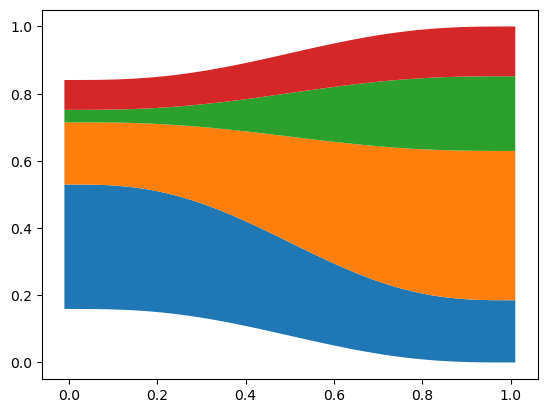

In [6]:
increments = np.tile(starting_level, reps=(cumsum.shape[0], 1)) + cumsum
points = np.vstack((starting_level,increments))

col_0 = points[:,0]
col_1 = points[:,1]
stage = 0
x = np.linspace(start=0, stop=1, num=100)
x = np.linspace(start=-0.01, stop=1.01, num=100)

fig, ax = plt.subplots()
for i, point in enumerate(col_0[:-1]):
    wave_bottom = inter_poly(x, parmaters=[0, col_0[i], 1, col_1[i]])
    wave_top = inter_poly(x, parmaters=[0, col_0[i+1], 1, col_1[i+1]])
    ax.fill_between(stage + x, wave_bottom, wave_top, linewidth=0)
plt.show()

(2, 600)
(2, 600)
(2, 600)
(2, 600)


<function matplotlib.pyplot.show(close=None, block=None)>

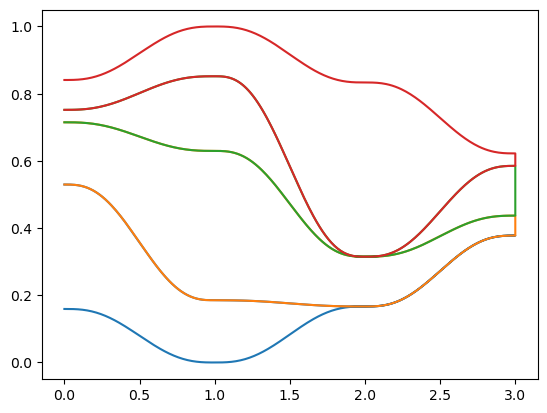

In [9]:
pts = 100
x = np.linspace(start=0, stop=1, num=pts)
xx = np.linspace(start=0, stop=3, num=3*pts)
fig, ax = plt.subplots()

# making arguments
paths = []

xx_args = np.zeros(shape=(pts*(points.shape[-1]-1)))
for i in range(points.shape[-1]-1):
    xx_args[i*pts:i*pts+pts] = i+np.linspace(start=0, stop=1, num=pts)

for path_no, (base, top) in enumerate(zip(points[:-1], points[1:])):

    # base_wave = np.zeros(shape=(pts*(base.shape[-1]-1)))
    # for stage, (v0, v1) in enumerate(zip(base[:-1], base[1:])):
    #     wave = inter_poly(x, parmaters=[0, v0, 1, v1])
    #     place = stage * pts
    #     base_wave[place : place + pts] = wave
    # ax.plot(xx_args, base_wave)

    row_zip = zip(base[:-1], base[1:])
    list_of_waves = [inter_poly(x, parmaters=[0, v0, 1, v1]) for (v0, v1) in row_zip ]
    base_wave = np.hstack(tup=list_of_waves)


    top_wave = np.zeros(shape=(pts*(top.shape[-1]-1)))
    for stage, (v0, v1) in enumerate(zip(top[:-1], top[1:])):
        wave = inter_poly(x, parmaters=[0, v0, 1, v1])
        place = stage * pts
        top_wave[place : place + pts] = wave
    # ax.plot(xx_args, top_wave)
    current_Y_path = np.hstack(tup=(base_wave, np.flip(top_wave)))
    current_X_path = np.hstack(tup=(xx_args,np.flip(xx_args)))
    xy = np.vstack(tup=(current_X_path, current_Y_path))
    paths.append(xy)

for path in paths:
    ax.plot(*path)
    print(path.shape)
plt.show

In [13]:
import numpy as np
x = np.linspace(start=0, stop=1, num=100)
xx = np.hstack(tup=[ i + x for i in range(3) ])

In [14]:
for patch in paths:
    ax.add_patch(patch)

    ax.imshow(
        xx.reshape(yy.size,1),   
        cmap=plt.cm.Reds,
        interpolation="bicubic",
        origin='lower',
        extent=[0, 10,- 0.0, 0.40],
        aspect="auto",
        clip_path=patch, 
        clip_on=True)
plt.show()

TypeError: 'p' must be an instance of matplotlib.patches.Patch, not a numpy.ndarray

In [45]:
data_num

array([[12, 20, 70,  5],
       [ 5, 30,  0, 20],
       [25, 60, 20,  8],
       [50, 25,  0,  0]])

### stages loop

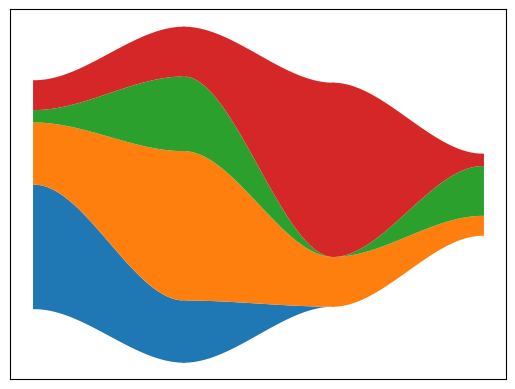

In [9]:
# print(points)
columns = points.T
fig, ax = plt.subplots()
my_colors = ['tab:blue','tab:orange','tab:green','tab:red']
for stage,tup in enumerate(zip(columns[:-1],columns[1:])):
    col_0 = tup[0]
    col_1 = tup[1]
    for i, point in enumerate(col_0[:-1]):
        wave_bottom = inter_poly(x, parmaters=[0, col_0[i], 1, col_1[i]])
        wave_top = inter_poly(x, parmaters=[0, col_0[i+1], 1, col_1[i+1]])
        ax.fill_between(stage + x, wave_bottom, wave_top, linewidth=0, color=my_colors[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()


In [75]:
a = [0,1,2,3]
[tup for tup in zip(a[:-1], a[1:])]

[(0, 1), (1, 2), (2, 3)]

## From csv

In [2]:
from pathlib import Path
import pandas

data_path = Path.cwd() / 'data'
data = pandas.read_csv(data_path / 'data.csv', delimiter=';')
data_num = data.to_numpy()

In [8]:
# max_of_columns = np.max(np.sum(a=data_num, axis=0))
data.columns.to_list()

['stage0', 'stage1', 'stage2', 'stage3']

In [28]:
data_num

array([[12, 20, 70,  5],
       [ 5, 30,  0, 20],
       [25, 60, 20,  8],
       [50, 25,  0,  0]], dtype=int64)

# Other

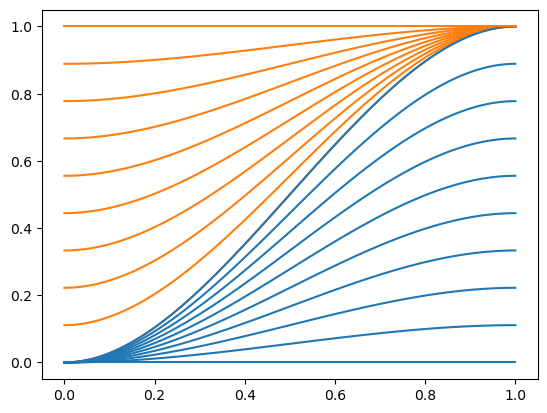

In [7]:
endpoints = np.linspace(0,1,10)
x = np.linspace(start=0,stop=1,num=100)
for point in endpoints:
    y = inter_poly(x, parmaters=[0, 0, 1, point])
    z = inter_poly(x, parmaters=[0, point, 1, 1])
    plt.plot(x,y,c='tab:blue')
    plt.plot(x,z,c='tab:orange')

plt.show()

(50, 2)


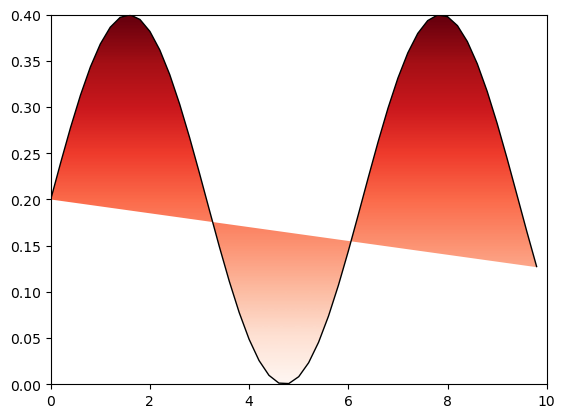

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

xx=np.arange(0,10,0.2)
yy= 0.2+0.2*np.sin(xx) #np.exp(-xx)
path = Path(np.array([xx,yy]).transpose())
patch = PathPatch(path, facecolor='none')
# plt.gca().add_patch(patch)
fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(xx.reshape(yy.size,1),   
                cmap=plt.cm.Reds,
                interpolation="bicubic",
                origin='lower',
                extent=[0, 10,- 0.0, 0.40],
                aspect="auto",
                clip_path=patch, 
                clip_on=True)
plt.show()

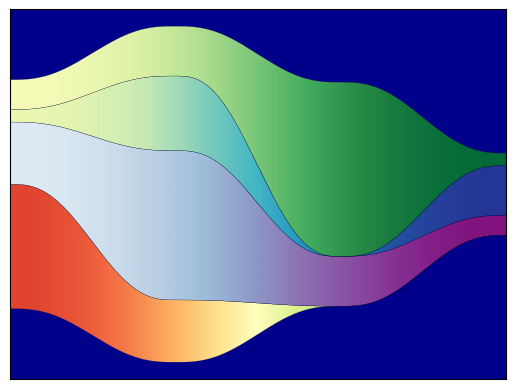

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, direction=0.5, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


# def gradient_bar(ax, x, y, width=0.5, bottom=0):
#     for left, top in zip(x, y):
#         right = left + width
#         gradient_image(ax, extent=(left, right, bottom, top),
#                        cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(0, 3), ylim=(-0.05, 1.05))
ax.set_facecolor("darkblue")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


# background image
# gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
#                cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

color_name_list = ['RdYlGn','BuPu', 'YlGnBu','YlGn']
for i, path in enumerate(paths):

    #adding a patches
    current_path = Path(path.T)
    patch = PathPatch(current_path, facecolor='none', edgecolor='k', linewidth=0.1)
    ax.add_patch(patch)

    #drawing a gradient
    im = gradient_image(
            ax, 
            direction=1, 
            cmap_range=(0.1, 0.9),
            extent=(0, 1, 0, 1), 
            transform=ax.transAxes,
            cmap=mpl.colormaps[color_name_list[i]], 
            alpha=1,
            clip_path=patch, 
            clip_on=True
            )
plt.show()

## colormaps

In [48]:
import matplotlib as mpl
type(mpl.colormaps['RdYlGn'])

matplotlib.colors.LinearSegmentedColormap

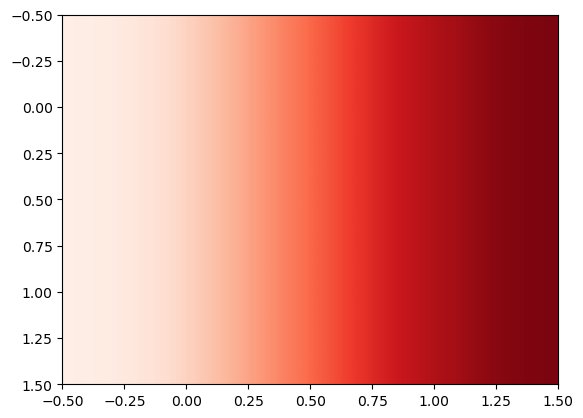

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from src.gradient import gradient_image

# res = 100
# arr = np.linspace(start=0, stop=1, num=res**2).reshape(-1,res)
# obj = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', ['#ffffff','#000000'], N=256, gamma=1.0)
obj = mpl.colors.LinearSegmentedColormap.from_list('my_gradient', ['w','k'], N=256, gamma=1.0)
fig, ax = plt.subplots()
# ax.imshow(arr, cmap=obj)
im = gradient_image(ax, direction=1, cmap='Reds')
plt.show()

In [10]:
from src.gradient import cmaps_dict

names_mpl_cmaps = [item for row in cmaps_dict.values() for item in row]


In [18]:
'patch_color_'+str(5)

'patch_color_5'

In [28]:
def set_colors(colors=[['b','g'], ['r','c'], ['m','y'], ['w','k']]):
    """ Argument color_pairs is a list with elements of the form:
            - single string with color in hex or colorname eg:
                '#393862', 'blue', or 'y'.
            - single matplotlib colormap name eg:
                'viridis', 'spring'.
            - list of colors eg:
                ['#393862','blue']
            List of colors are passed to mpl.colors.LinearSegmentedColormap
            to create colormap.
        """
    cmaps_for_patches = []
    for i ,color in enumerate(colors):
        if color in names_mpl_cmaps:
            cmaps_for_patches.append(color)
        elif isinstance(color, list):
            cmaps_for_patches.append(
                mpl.colors.LinearSegmentedColormap.from_list(
                    'color_patch'+str(i), color, N=256, gamma=1.0
                    )
                )
        else:
            cmaps_for_patches.append(
                mpl.colors.LinearSegmentedColormap.from_list(
                    'color_patch'+str(i), [color, color], N=256, gamma=1.0
                    )

                )
    return cmaps_for_patches
cmaps_for_garients = set_colors()
cmaps_for_garients.append('viridis')


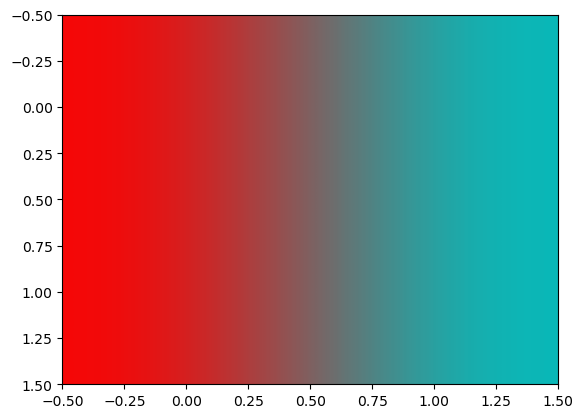

In [29]:
fig, ax = plt.subplots()
im = gradient_image(ax, direction=1, cmap=cmaps_for_garients[1])
plt.show()

## labels

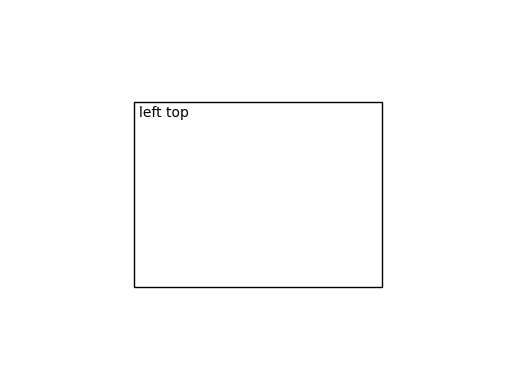

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

# Build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
p = Rectangle((left, bottom), width, height, fill=False, lw=None)
# p.set_transform(ax.transAxes)
# p.set_clip_on(False)
ax.add_patch(p)

ax.text(left+0.01, top-0.01, 'left top',
        horizontalalignment='left',
        verticalalignment='top')
        # transform=ax.transAxes)

ax.set_axis_off()

plt.show()

In [26]:
fg.data_dict['labels']

['stage0', 'stage1', 'stage2', 'stage3']

# Class design

In [1]:
import importlib
import src
from src.funel_graph import FunelGraph
importlib.reload(src.funel_graph)

fg = FunelGraph()
fg.prepare()
fg.data_for_labels()

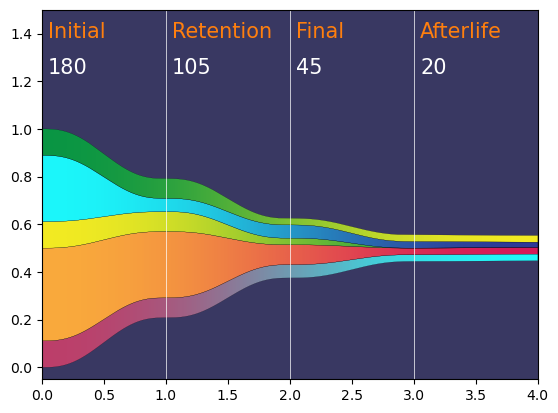

In [3]:
import matplotlib.pyplot as plt
colors = [
    ['#C33764', '#1BFFFF'],
    ['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],
    ['#1BFFFF', '#2E3192'],
    ['#009245', '#FCEE21']
    ]
im = fg.draw(colors=colors)
plt.savefig('example.png')
plt.show()

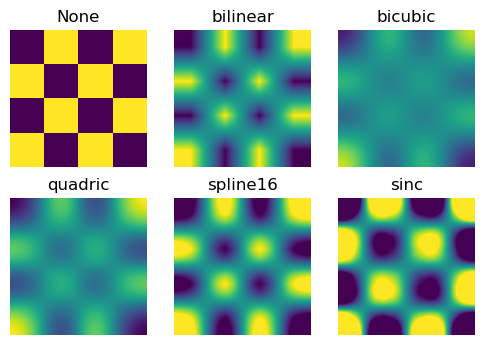

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 4))
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]])
inter_name = [None, 'bilinear', 'bicubic', 'quadric', 'spline16', 'sinc']
for ax, interpolation in zip(axs.flat,inter_name):
    ax.imshow(X, interpolation=interpolation, cmap='viridis', clim=(0, 1), aspect='equal')
    ax.set_title(str(interpolation))
    ax.set_axis_off()
plt.show()

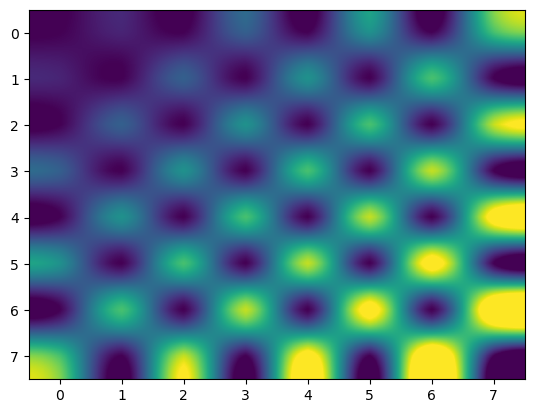

In [11]:
direction = 0.5
phi = direction * np.pi / 2
v = np.array([np.cos(phi), np.sin(phi)])
res = 4
# 0,1 checkerboard
zero_one, one_zero = np.array([0,1]), np.array([1,0])
even_row = np.tile(zero_one, reps=(1,res))
odd__row = np.tile(one_zero, reps=(1,res))
arr = np.zeros((2*res, 2*res))
for row_no in range(2*res):
    arr[row_no] = even_row if row_no % 2 == 0 else odd__row

# array of points creation 
x, y = np.linspace(0,1,2*res), np.linspace(0,1,2*res)
m = np.transpose(a=np.array(np.meshgrid(x,y)), axes=(2,1,0))
directed = (m.reshape(-1,2) @ v).reshape(2*res,2*res) 
im_arg = np.multiply(arr, directed)

fig, ax = plt.subplots()
ax.imshow(im_arg, cmap='viridis', clim=(0, 1), aspect="auto", interpolation="spline16")
plt.show()

text width 79.75
rectangle width 248.0
text height 14.0
rectangle height 184.8
text width 249.625
rectangle width 248.0
text height 42.0
rectangle height 184.8


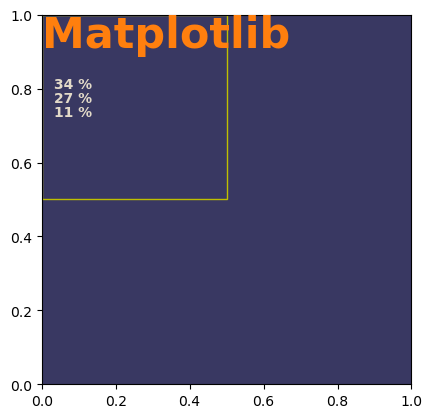

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# plt.rcParams["font.size"] = 20
fig, ax = plt.subplots()
ax.set_facecolor('#393862')
ax.set_aspect('equal')

def rescale_text(rect, text):
    r = rect.get_window_extent()
    t = text.get_window_extent()
    print(f'text width {t.width}')
    print(f'rectangle width {r.width}')
    print(f'text height {t.height}')
    print(f'rectangle height {r.height}')
    scale = min(r.height / t.height, r.width / t.width)
    text.set_size(text.get_size() * scale)

title_dict = dict(
    color="tab:orange",
    va='top', ha='left',
    family='sans-serif',
    weight="bold", 
    )
numbs_dict = dict(
    color='#e3dac9', 
    weight='bold', 
    family='sans-serif'
    )
# testing rectangle
x0, y0 = 0.0, 0.5
x1, y1 = 0.5, 1
width = x1 - x0
height = y1 - y0

rect = Rectangle((x0, y0), width, height, fc="none", ec="y")
ax.add_patch(rect)


# variable <text> enables subsequent words, to be positioned with annotate(), relative to the preceding one.
gap = 0.05
text = ax.text(x0, y1, "Matplotlib", **title_dict)
rescale_text(rect, text)
rescale_text(rect, text)
text = ax.annotate(
    "34 %", xycoords=text, xy=(0.05, -0.5), va="top", ha='left', **numbs_dict)
text = ax.annotate(
    "27 %", xycoords=text, xy=(1, 0), va="top", ha='right', **numbs_dict)
text = ax.annotate(
    "11 %", xycoords=text, xy=(1, 0), va="top",ha='right', **numbs_dict)
plt.show()